# Data Analysis of COVID19 Dataset

### Lets import the important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Now Lets read the dataset

In [2]:
data = pd.read_csv('/Users/manis/Downloads/COVID19_line_list_data.csv')
data.head()

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,...,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,...,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,...,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,...,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
print('The covid dataset has {} rows and {} columns...'.format(data.shape[0], data.shape[1]))

The covid dataset has 1085 rows and 27 columns...


### Now lets find out which features contains how much % NaN values

In [4]:
data.isnull().mean()

id                       0.000000
case_in_country          0.181567
reporting date           0.000922
Unnamed: 3               1.000000
summary                  0.004608
location                 0.000000
country                  0.000000
gender                   0.168664
age                      0.223041
symptom_onset            0.481106
If_onset_approximated    0.483871
hosp_visit_date          0.532719
exposure_start           0.882028
exposure_end             0.685714
visiting Wuhan           0.000000
from Wuhan               0.003687
death                    0.000000
recovered                0.000000
symptom                  0.751152
source                   0.000000
link                     0.000000
Unnamed: 21              1.000000
Unnamed: 22              1.000000
Unnamed: 23              1.000000
Unnamed: 24              1.000000
Unnamed: 25              1.000000
Unnamed: 26              1.000000
dtype: float64

### We can notice that some features like 'Unnamed: 3', 'Unnamed: 21', 'Unnamed: 22',...etc. are containing all missing values (100%). So there is no use of such columns in prediction. So it will be better to drop those features while doing feature engineering of data. 

In [5]:
data = data[data.columns[data.isnull().mean()<1]]

In [6]:
data.head()

,id,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link
0,1,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,0.0,01/11/20,12/29/2019,01/04/20,1,0.0,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
1,2,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,0.0,1/15/2020,NaN,01/12/20,0,1.0,0,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...
2,3,NaN,1/21/2020,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,0.0,1/17/2020,NaN,01/03/20,0,1.0,0,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...
3,4,NaN,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,NaN,1/19/2020,NaN,NaN,1,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
4,5,NaN,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,NaN,1/14/2020,NaN,NaN,0,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?


### Now lets look at the 5 number summary of dataset

In [7]:
data.describe()

,id,case_in_country,age,If_onset_approximated,visiting Wuhan,from Wuhan
count,1085.000000,888.000000,843.000000,560.000000,1085.000000,1081.000000
mean,543.000000,48.841216,49.483689,0.042857,0.176959,0.144311
std,313.356825,78.853528,18.255334,0.202716,0.381810,0.351567
min,1.000000,1.000000,0.250000,0.000000,0.000000,0.000000
25%,272.000000,11.000000,35.000000,0.000000,0.000000,0.000000
50%,543.000000,28.000000,51.000000,0.000000,0.000000,0.000000
75%,814.000000,67.250000,64.000000,0.000000,0.000000,0.000000
max,1085.000000,1443.000000,96.000000,1.000000,1.000000,1.000000


### We can drop the feature 'id' as it is just like row number

### Now lets look at the correlation of the dataset

In [8]:
data.corr()

,id,case_in_country,age,If_onset_approximated,visiting Wuhan,from Wuhan
id,1.000000,-0.214701,-0.033531,0.192419,-0.201191,-0.277776
case_in_country,-0.214701,1.000000,0.139974,-0.246004,-0.179966,-0.156511
age,-0.033531,0.139974,1.000000,-0.026587,-0.186654,0.066846
If_onset_approximated,0.192419,-0.246004,-0.026587,1.000000,0.218182,0.011592
visiting Wuhan,-0.201191,-0.179966,-0.186654,0.218182,1.000000,-0.182723
from Wuhan,-0.277776,-0.156511,0.066846,0.011592,-0.182723,1.000000


<AxesSubplot:>

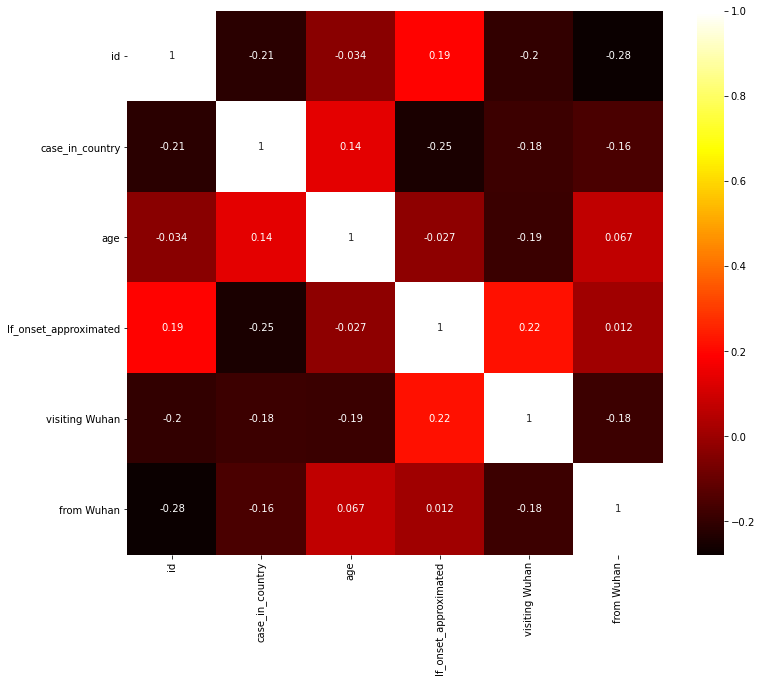

In [9]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True, cmap='hot')

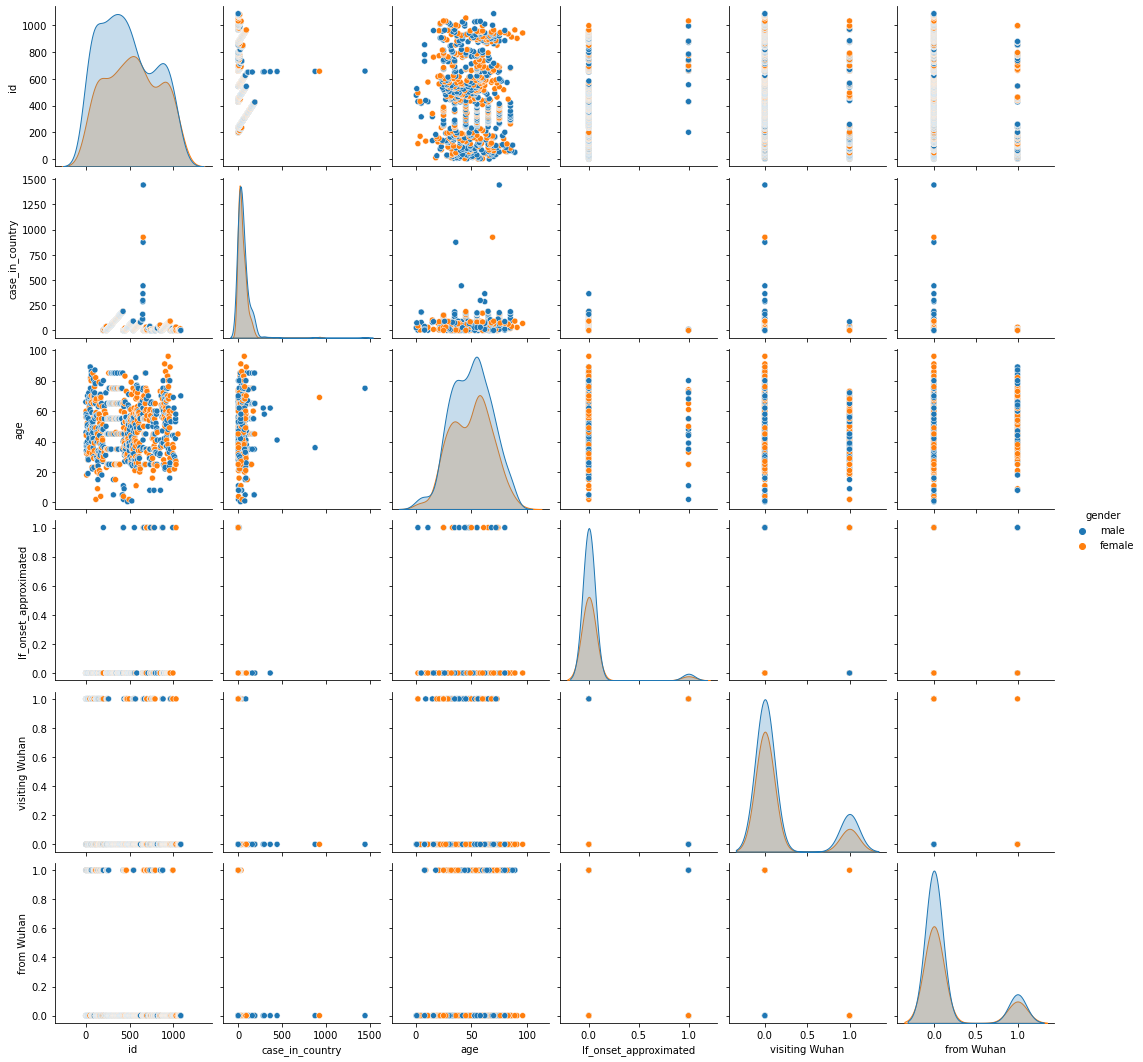

In [10]:
sns.pairplot(data, hue='gender')

### We can see there is not much correlation between features

### Now lets find out numerical features in dataset

In [11]:
num_feat = [feature for feature in data.columns if data[feature].dtype!='O']
print('There are {} numerical features in COVID19 dataset..'.format(len(num_feat)))
num_feat

There are 6 numerical features in COVID19 dataset..


['id',
 'case_in_country',
 'age',
 'If_onset_approximated',
 'visiting Wuhan',
 'from Wuhan']

### Now Lets seperate this numerical feature into discrete features and continuous features

In [12]:
disc_feat = [feature for feature in num_feat if len(data[feature].unique())<20]
cont_feat = [feature for feature in num_feat if feature not in disc_feat]
print('There are {} discrete features in COVID19 dataset..'.format(len(disc_feat)))
print(disc_feat)
print('\n\nThere are {} continuous feature in COVID19 dataset..'.format(len(cont_feat)))
print(cont_feat)

There are 3 discrete features in COVID19 dataset..
['If_onset_approximated', 'visiting Wuhan', 'from Wuhan']


There are 3 continuous feature in COVID19 dataset..
['id', 'case_in_country', 'age']


### Lets see how many unique values are there in discrete feature

In [13]:
for feature in disc_feat:
    print(feature, ' has {} unique values..'.format(len(data[feature].unique())))
    print(data[feature].unique())
    print('\n')

If_onset_approximated  has 3 unique values..
[ 0. nan  1.]


visiting Wuhan  has 2 unique values..
[1 0]


from Wuhan  has 3 unique values..
[ 0.  1. nan]




### Now lets have a look on continuous feature

C:\Users\manis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


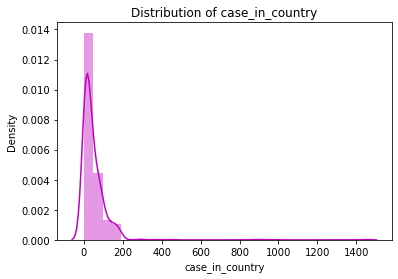

C:\Users\manis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


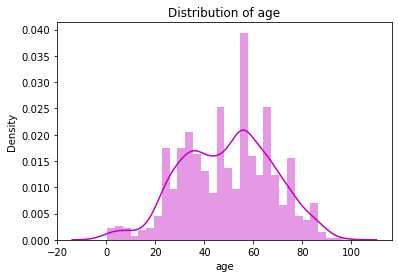

In [14]:
for feature in cont_feat:
    if feature=='id':
        pass
    else:
        sns.distplot(data[feature], bins=30, color='m')
        plt.xlabel(feature)
        plt.title('Distribution of '+feature)
        plt.show()

### Working with outliers

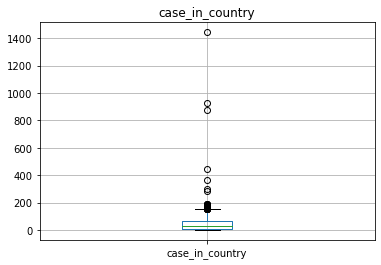

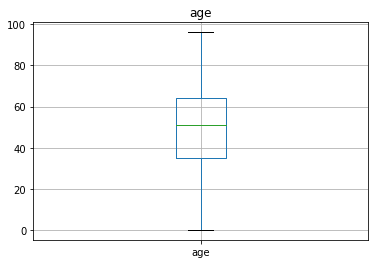

In [15]:
for feature in cont_feat:
    if feature=='id':
        pass
    else:
        data.boxplot(feature)
        plt.title(feature)
        plt.show()

### There are so many outliers lets visualize it in distplot

sd Range of  case_in_country :  -108.777  to  206.4594
There are 7 sd outliers in  case_in_country
[286.0, 298.0, 365.0, 443.0, 875.0, 925.0, 1443.0]


C:\Users\manis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


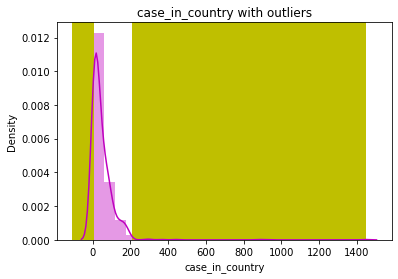

sd Range of  age :  12.9947  to  85.9727
There are 29 sd outliers in  age
[89.0, 89.0, 86.0, 87.0, 2.0, 9.0, 4.0, 9.0, 5.0, 5.0, 5.0, 5.0, 11.0, 2.0, 4.0, 9.0, 0.5, 2.0, 1.0, 11.0, 6.0, 8.0, 0.25, 8.0, 8.0, 91.0, 86.0, 96.0, 89.0]


C:\Users\manis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


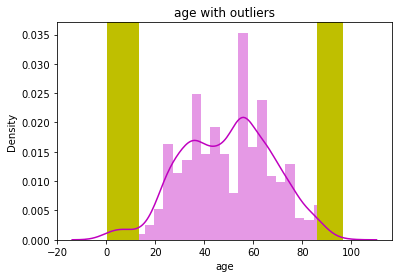

In [16]:
for feature in cont_feat:
    if feature=='id':
        pass
    else:
        l = np.mean(data[feature])-2*np.std(data[feature])
        h = np.mean(data[feature])+2*np.std(data[feature])
        print('sd Range of ', feature, ': ', np.round(l,4), ' to ', np.round(h,4))
        outliers = []
        values = []
        for val in data[feature].values:
            if val>h or val<l:
                outliers.append(1)
                values.append(val)
            else:
                outliers.append(0)
        d = data.copy()
        d[feature+'_sd_outliers'] = outliers
        print('There are {} sd outliers in '.format(len(values)), feature)
        print(values)
        sns.distplot(data[feature], bins=25, color='m')
        #plt.axvline(x=minimum, ymin=0, ymax=1, fillstyle='left', color='m')
        #plt.axvline(x=maximum, ymin=0, ymax=1, fillstyle='right', color='m')
        plt.axvspan(h, data[feature].max(), color='y')
        plt.axvspan(data[feature].min(), l, color='y')
        plt.title(feature+' with outliers')
        plt.xlabel(feature)
        plt.show()
    

sd Range of  case_in_country :  -73.375  to  151.625
There are 47 iqr outliers in  case_in_country
[152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 186.0, 187.0, 188.0, 189.0, 190.0, 161.0, 286.0, 298.0, 365.0, 443.0, 875.0, 925.0, 1443.0]


C:\Users\manis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


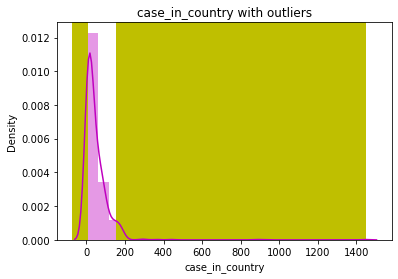

sd Range of  age :  -8.5  to  107.5
There are 0 iqr outliers in  age
[]


C:\Users\manis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


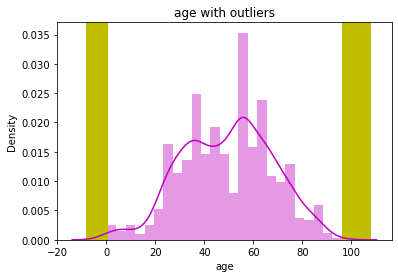

In [17]:
for feature in cont_feat:
    if feature=='id':
        pass
    else:
        q3 = data[feature].quantile(0.75)
        q1 = data[feature].quantile(0.25)
        iqr = q3-q1
        l = q1-1.5*iqr
        h = q3+1.5*iqr
        print('sd Range of ', feature, ': ', np.round(l,4), ' to ', np.round(h,4))
        outliers = []
        values = []
        for val in data[feature].values:
            if val>h or val<l:
                outliers.append(1)
                values.append(val)
            else:
                outliers.append(0)
        d = data.copy()
        d[feature+'_sd_outliers'] = outliers
        print('There are {} iqr outliers in '.format(len(values)), feature)
        print(values)
        sns.distplot(data[feature], bins=25, color='m')
        #plt.axvline(x=minimum, ymin=0, ymax=1, fillstyle='left', color='m')
        #plt.axvline(x=maximum, ymin=0, ymax=1, fillstyle='right', color='m')
        plt.axvspan(h, data[feature].max(), color='y')
        plt.axvspan(data[feature].min(), l, color='y')
        plt.title(feature+' with outliers')
        plt.xlabel(feature)
        plt.show()


### Lets look at categorical features now

In [18]:
cat_feat = [feature for feature in data.columns if data[feature].dtype=='O']
print('There are {} categorical features in COVID19 Dataset..'.format(len(cat_feat)))
cat_feat

There are 14 categorical features in COVID19 Dataset..


['reporting date',
 'summary',
 'location',
 'country',
 'gender',
 'symptom_onset',
 'hosp_visit_date',
 'exposure_start',
 'exposure_end',
 'death',
 'recovered',
 'symptom',
 'source',
 'link']

In [19]:
data[cat_feat].head()

,reporting date,summary,location,country,gender,symptom_onset,hosp_visit_date,exposure_start,exposure_end,death,recovered,symptom,source,link
0,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,01/03/20,01/11/20,12/29/2019,01/04/20,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
1,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,1/15/2020,1/15/2020,NaN,01/12/20,0,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...
2,1/21/2020,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,01/04/20,1/17/2020,NaN,01/03/20,0,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...
3,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,NaN,1/19/2020,NaN,NaN,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
4,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,NaN,1/14/2020,NaN,NaN,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?


### We can see there are some time series data in some of the features like 'reporting date', 'symptom_onset', ...etc. We have to deal with them differently

In [20]:
time_feature = [feature for feature in cat_feat if 'date' in feature or '_' in feature]

In [21]:
print('There are {} features with Time series data.'.format(len(time_feature)))
time_feature

There are 5 features with Time series data.


['reporting date',
 'symptom_onset',
 'hosp_visit_date',
 'exposure_start',
 'exposure_end']

### If we notice 'death' and 'recovered' features are also not categorical. Lets see the unique values present in it

In [22]:
data['death'].value_counts()

0            1022
1              42
2/23/2020       4
2/26/2020       3
2/27/2020       2
2/19/2020       2
2/21/2020       2
2/25/2020       2
2/13/2020       1
2/22/2020       1
2/14/2020       1
02/01/20        1
2/28/2020       1
2/24/2020       1
Name: death, dtype: int64

In [23]:
data['recovered'].value_counts()

0             926
2/18/2020      13
2/19/2020      13
12/30/1899     12
02/12/20       11
2/21/2020      10
2/20/2020       9
2/15/2020       9
2/14/2020       8
2/17/2020       7
2/24/2020       7
1               7
2/26/2020       6
02/09/20        6
2/25/2020       5
2/27/2020       5
02/06/20        4
02/04/20        4
2/22/2020       3
02/11/20        3
2/16/2020       3
1/30/2020       2
02/05/20        2
02/08/20        2
2/23/2020       1
1/15/2020       1
2/28/2020       1
1/31/2020       1
1/17/2020       1
02/02/20        1
2/13/2020       1
02/07/20        1
Name: recovered, dtype: int64

### That means 'death' and 'recovered' features are also time series data

In [24]:
time_feature = time_feature + ['death', 'recovered']

In [25]:
time_feature

['reporting date',
 'symptom_onset',
 'hosp_visit_date',
 'exposure_start',
 'exposure_end',
 'death',
 'recovered']

### So we have filtered out all features with time series data out of categorical features. Lets update the categorical feature again

In [26]:
cat_feat = [feature for feature in cat_feat if feature not in time_feature]
cat_feat

['summary', 'location', 'country', 'gender', 'symptom', 'source', 'link']

In [27]:
data[cat_feat].head()

,summary,location,country,gender,symptom,source,link
0,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
1,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...
2,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...
3,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
4,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?


### Lets see how many unique values are there in each categorical feature

In [28]:
for feature in cat_feat:
    print(feature, ' has {} unique values'.format(len(data[feature].unique())))

summary  has 968 unique values
location  has 156 unique values
country  has 38 unique values
gender  has 3 unique values
symptom  has 109 unique values
source  has 85 unique values
link  has 490 unique values


### There are so many unique values in almost every features. Only 'gender' feature contains less unique values

### Now lets analyse time series feature

In [29]:
data[time_feature].head()

,reporting date,symptom_onset,hosp_visit_date,exposure_start,exposure_end,death,recovered
0,1/20/2020,01/03/20,01/11/20,12/29/2019,01/04/20,0,0
1,1/20/2020,1/15/2020,1/15/2020,NaN,01/12/20,0,0
2,1/21/2020,01/04/20,1/17/2020,NaN,01/03/20,0,0
3,1/21/2020,NaN,1/19/2020,NaN,NaN,0,0
4,1/21/2020,NaN,1/14/2020,NaN,NaN,0,0


In [30]:
for feature in time_feature:
    if feature in ['death', 'recovered']:
        pass
    else:
        data[feature] = pd.to_datetime(data[feature])

In [31]:
data[time_feature].tail()

,reporting date,symptom_onset,hosp_visit_date,exposure_start,exposure_end,death,recovered
1080,2020-02-25,NaT,NaT,NaT,NaT,0,0
1081,2020-02-24,NaT,NaT,NaT,NaT,0,0
1082,2020-02-26,NaT,NaT,NaT,2020-02-17,0,0
1083,2020-02-25,NaT,NaT,2020-02-19,2020-02-21,0,0
1084,2020-02-25,2020-02-17,NaT,2020-02-15,2020-02-15,0,0


### Lets find out time features that contain nan values 

In [32]:
data[time_feature].isnull().mean()

reporting date     0.000922
symptom_onset      0.481106
hosp_visit_date    0.532719
exposure_start     0.882028
exposure_end       0.685714
death              0.000000
recovered          0.000000
dtype: float64

### We have analysed that there are so many Nan values in time series features too